1.Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

2.Import data

In [2]:
data = pd.read_excel('../resources/data/loan_data.xlsx')
data.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


3.DATA INFORMATION

In [3]:
data.dtypes

ID                      int64
Age                     int64
Gender                 object
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Home Ownership         object
Personal Loan          object
Securities Account      int64
CD Account              int64
Online                float64
CreditCard              int64
dtype: object

In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,2500.500000,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.880600,56.498800,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839812,101.713802,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

4.Null value handaling

In [6]:
data.isnull().sum()*100/len(data)

ID                     0.00
Age                    0.00
Gender                31.92
Experience             0.00
Income                 1.34
ZIP Code               0.00
Family                 0.00
CCAvg                  0.00
Education              0.00
Mortgage               0.00
Home Ownership        23.78
Personal Loan          0.00
Securities Account     0.00
CD Account             0.00
Online                 0.80
CreditCard             0.00
dtype: float64

In [7]:
columns_array = np.array(data.columns)

for c in columns_array:
    uniq= data[c].unique()
    print(c,uniq)

ID [   1    2    3 ... 4998 4999 5000]
Age [ 25  45  39  35  37  53  50  34  65  29  48  59  67  60  38  42  46  55
  56  57  44  36  43  40  30  31  51  32  97  61 567  41  28  49  47  62
  58   0  33  27  13  54  66  24  52 122  26  64  63  23 978   2   4 786
 600   7   8 797]
Gender ['M' 'F' 'O' nan '#' '-']
Experience [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income [ 49.  34.  11. 100.  45.  29.  72.  22.  81. 180. 105. 114.  40. 112.
 130. 193.  21.  25.  63.  62.  43. 152.  83. 158.  48.  nan  35.  41.
  18.  50. 121.  71.  80.  84.  60. 132. 104.  52. 194.   8. 131. 190.
  44. 139.  93. 188.  39. 125.  32.  20. 115.  69.  85. 135.  12.  19.
  82. 109.  42.  78.  51. 113. 118.  64. 161.  94.  15.  74.  30.  38.
   9.  92.  61.  73.  70. 149.  98. 128.  31.  58.  54. 124. 163.  24.
  79. 134.  23.  13. 138. 171. 168.  65.  10. 148. 159. 169. 144. 165.
  59.  68.  91. 172.  55. 15

Drope null value less than 5%

In [8]:
data.dropna(subset=['Income','Online'],inplace=True,axis=0)
data.reset_index(drop=True,inplace=True)

In [9]:
data['Gender'].value_counts()

M    1626
F    1560
O      89
-      21
#       3
Name: Gender, dtype: int64

Replace non-standard value with standard value

In [10]:
data.replace("#",np.nan,inplace=True)
data.replace("-",np.nan,inplace=True)

Replace non-standard value with standard value

In [11]:
data.replace(" ",np.nan,inplace=True)

In [12]:
data['Personal Loan'].value_counts()

0.0    4520
1.0     374
Name: Personal Loan, dtype: int64

Drope null value less than 5%

In [13]:
data.dropna(subset=['Personal Loan'],inplace=True,axis=0)
data.reset_index(drop=True,inplace=True)

<Axes: >

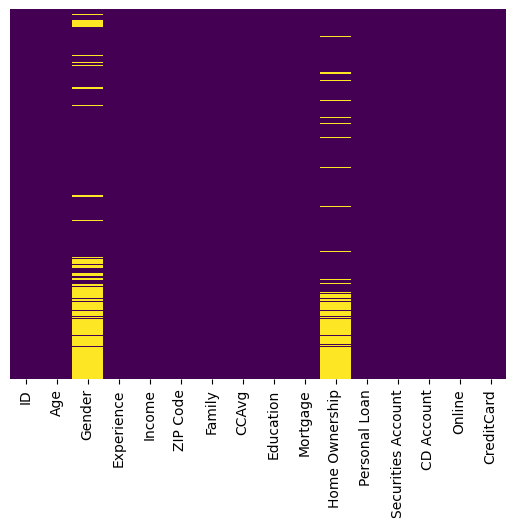

In [15]:
# Visualize empty value
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
# data['Gender']
data['Gender'].value_counts(normalize=True)

M    0.496335
F    0.476481
O    0.027184
Name: Gender, dtype: float64

<Axes: xlabel='Gender', ylabel='Count'>

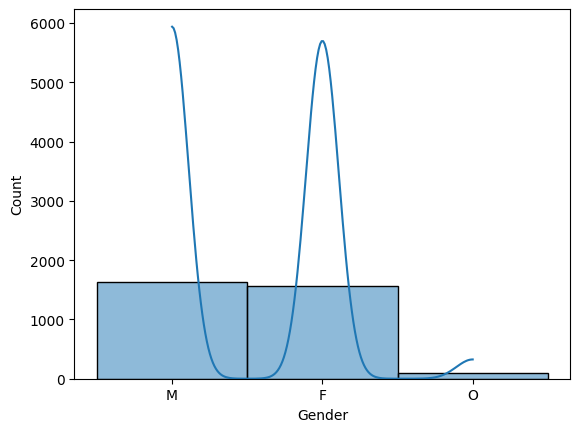

In [20]:
# Visualize the  distribution of 'Gender'
sns.histplot(data['Gender'], kde=True)

Replace null value with mode

In [21]:
from sklearn.impute import SimpleImputer
mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Gender']=mode.fit_transform(data[['Gender']])

ownership_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Home Ownership']=mode.fit_transform(data[['Home Ownership']])

In [ ]:
data.head(5)

Data Visualization And  outliers Management

In [ ]:
def Graphplot(column):
    sns.distplot(data[column])

In [ ]:
Graphplot('Age')

In [ ]:
def Boxplot(column):
    sns.boxplot(data[column])

In [ ]:
Boxplot('Age')

In [ ]:
sns.boxplot(new_data['Age'])

In [ ]:
sns.boxplot(data['Age'])

Percentile Method

In [ ]:
data

In [22]:
# find the number of outliers function
def NumberOutliers(column,df):
    # find limit
    upper_limit =df[column].quantile(0.99)
    lower_limit =df[column].quantile(0.01)
    # find the outlier 
    out=df.loc[(df[column] >upper_limit) | (df[column] < lower_limit)]
    return len(out)

In [23]:
# find the number of outliers in each column
Total_outlier = []
columns = data.head(0)
for c in columns:
    if data[c].dtype in ['int64','float64']:
        num = NumberOutliers(c, data)
        Total_outlier.append((c, num))
Total_outlier

[('ID', 98),
 ('Age', 88),
 ('Experience', 30),
 ('Income', 69),
 ('ZIP Code', 73),
 ('Family', 0),
 ('CCAvg', 47),
 ('Education', 0),
 ('Mortgage', 48),
 ('Personal Loan', 0),
 ('Securities Account', 0),
 ('CD Account', 0),
 ('Online', 0),
 ('CreditCard', 0)]

In [24]:
# Capping Outliers function
def RemoveOutliers(column,df):
    # find limit
    upper_limit =df[column].quantile(0.99)
    lower_limit =df[column].quantile(0.01)
    # find the outlier 
    out=df.loc[(df[column] >upper_limit) | (df[column] < lower_limit)]
    # capping outlier 
    df.loc[(df[column]>upper_limit),column] = upper_limit
    df.loc[(df[column]<lower_limit),column] = lower_limit
    return df

In [25]:
# Capp outliers from each column
columns = data.head(0)
for c in columns:
    if data[c].dtype in ['int64','float64']:
        RemoveOutliers(c,data)

categorical data handeling

In [26]:
data

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,52.93,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0.0,1,0,0.0,0
1,52.93,45,M,19,34.0,90089,3,1.5,1,0,Rent,0.0,1,0,0.0,0
2,52.93,39,M,15,11.0,94720,1,1.0,1,0,Rent,0.0,0,0,0.0,0
3,52.93,35,M,9,100.0,94112,1,2.7,2,0,Rent,0.0,0,0,0.0,0
4,52.93,35,M,8,45.0,91330,4,1.0,2,0,Rent,0.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,4950.07,29,M,3,40.0,92697,1,1.9,3,0,Home Mortage,0.0,0,0,1.0,0
4890,4950.07,30,M,4,15.0,92037,4,0.4,1,85,Home Mortage,0.0,0,0,1.0,0
4891,4950.07,63,M,39,24.0,93023,2,0.3,3,0,Home Mortage,0.0,0,0,0.0,0
4892,4950.07,65,M,40,49.0,90034,3,0.5,2,0,Home Mortage,0.0,0,0,1.0,0


In [27]:
data.isnull().sum()

ID                    0
Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Using onehotkey encoding

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_val=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2,10])],remainder='passthrough')
data =pd.DataFrame(categorical_val.fit_transform(data))

In [29]:
# data.columns =['Home Mortage','Rent','Home Owner','M','F','O','ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
data.columns =['Female','Male','Other','Home Mortage','Home Owner','Rent','ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']

In [30]:
count_negative_valuess = np.sum(data < 0)
count_negative_valuess

Female                 0
Male                   0
Other                  0
Home Mortage           0
Home Owner             0
Rent                   0
ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [31]:
data = np.abs(data)

In [32]:
# Save the modified Dataset to a new file
data.to_csv('../resources/data/modified_data.csv', index=False)

In [34]:
data_sec = pd.read_csv('../resources/data/modified_data.csv')

In [35]:
data_sec

,Female,Male,Other,Home Mortage,Home Owner,Rent,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.0,1.0,0.0,0.0,1.0,0.0,52.93,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,52.93,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,52.93,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,52.93,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,52.93,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,0.0,1.0,0.0,1.0,0.0,0.0,4950.07,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4890,0.0,1.0,0.0,1.0,0.0,0.0,4950.07,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4891,0.0,1.0,0.0,1.0,0.0,0.0,4950.07,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4892,0.0,1.0,0.0,1.0,0.0,0.0,4950.07,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
data_sec.drop(columns=['ID'], inplace=True)

In [37]:
data_sec

,Female,Male,Other,Home Mortage,Home Owner,Rent,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.0,1.0,0.0,0.0,1.0,0.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,0.0,1.0,0.0,1.0,0.0,0.0,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,0.0,1.0,0.0
4890,0.0,1.0,0.0,1.0,0.0,0.0,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,0.0,1.0,0.0
4891,0.0,1.0,0.0,1.0,0.0,0.0,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4892,0.0,1.0,0.0,1.0,0.0,0.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,0.0,1.0,0.0


# DEFINE Dependent And Independent Variable and splitt data X and y train and test

In [38]:
X=data_sec.drop('Personal Loan',axis=1)
Y=data_sec['Personal Loan']

In [39]:
X.describe()

,Female,Male,Other,Home Mortage,Home Owner,Rent,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.318758,0.663057,0.018186,0.582141,0.229669,0.188190,45.351451,20.127707,72.173273,93160.882509,2.387413,1.892675,1.872701,54.786882,0.104618,0.054352,0.596240,0.292195
std,0.466042,0.472714,0.133636,0.493257,0.420663,0.390903,11.453828,11.410724,44.958411,1753.519711,1.146126,1.693399,0.839902,96.297429,0.306092,0.226735,0.490701,0.454818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,9.000000,90024.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,10.000000,38.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,55.000000,30.000000,93.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,41.000000,193.000000,95929.000000,4.000000,7.900000,3.000000,428.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
from sklearn.model_selection import train_test_split
# splitt dataset in train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [41]:
X_train.shape,X_test.shape

((3915, 18), (979, 18))

FEATURE SCALING using Standardization

In [42]:
# Feature Scaling Using Standardization
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
# featuring scaling (standardization) for train dataset
X_train.iloc[:,[6, 7, 8, 9, 10,11, 12,13]] = sc.fit_transform(X_train.iloc[:,[6, 7, 8, 9, 10,11, 12,13]])

# featuring scaling (standardization) for test dataset
X_test.iloc[:,[6, 7, 8, 9, 10,11, 12,13]] = sc.transform(X_test.iloc[:,[6, 7, 8, 9, 10,11, 12,13]])

In [423]:
# Feature Scaling Using Normalization
# from sklearn.preprocessing import MinMaxScaler
# MN =MinMaxScaler()
# # featuring scaling (standardization) for train dataset
# X_train.iloc[:,[6, 7, 8, 9, 10,11, 12,13]] = MN.fit_transform(X_train.iloc[:,[6, 7, 8, 9, 10,11, 12,13]])

# # featuring scaling (standardization) for test dataset
# X_test.iloc[:,[6, 7, 8, 9, 10,11, 12,13]] = MN.transform(X_test.iloc[:,[6, 7, 8, 9, 10,11, 12,13]])

In [43]:
X_train.describe()

,Female,Male,Other,Home Mortage,Home Owner,Rent,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3.915000e+03,3.915000e+03,3.915000e+03,3.915000e+03,3.915000e+03,3.915000e+03,3.915000e+03,3.915000e+03,3915.000000,3915.000000,3915.000000,3915.000000
mean,0.315709,0.666411,0.017880,0.588506,0.226820,0.184674,-3.402982e-17,7.350442e-17,-1.515462e-16,-4.070874e-15,5.717011e-17,-1.801312e-16,1.461014e-16,3.085371e-17,0.104981,0.057471,0.597446,0.293231
std,0.464857,0.471555,0.132532,0.492167,0.418829,0.388083,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,0.306568,0.232771,0.490475,0.455302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.785196e+00,-1.771235e+00,-1.400858e+00,-1.782757e+00,-1.209323e+00,-1.126768e+00,-1.041063e+00,-5.681940e-01,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.139074e-01,-8.965648e-01,-7.599861e-01,-7.106336e-01,-1.209323e+00,-7.112557e-01,-1.041063e+00,-5.681940e-01,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.451028e-02,-2.189468e-02,-2.075106e-01,1.403572e-01,-3.378891e-01,-2.363844e-01,1.527747e-01,-5.681940e-01,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,8.286702e-01,8.527755e-01,4.775590e-01,8.230826e-01,5.335443e-01,3.572047e-01,1.346613e+00,4.712775e-01,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.699959e+00,1.814913e+00,2.665362e+00,1.574024e+00,1.404978e+00,3.562586e+00,1.346613e+00,3.880744e+00,1.000000,1.000000,1.000000,1.000000


Perform PCA

In [44]:
# Pca perform for feature selection 
from sklearn.decomposition import PCA
pca =PCA(0.95)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
# dtf =pd.DataFrame(X_pca,columns=data.columns)
X_train_pca.shape,X_test_pca.shape

((3915, 11), (979, 11))

MODEL TRAIN AND TEST

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import joblib 

def Train_Test_Model(model,X_train,Y_train,X_test,Y_test,X,Y):
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)
    acc=accuracy_score(Y_test,pre)
    scor=cross_val_score(model,X,Y,cv=5)
    crossscor =np.mean(scor)*100
    precision = precision_score(Y_test, pre)
    recall = recall_score(Y_test, pre)
    # joblib.dump(model,f'{model}_SAVED_Trained_MODELL')
    joblib.dump(model,f'../resources/model/{model}_SAVED_Trained_MODELL')
    return crossscor,acc,precision,recall

In [46]:
# using different model
model =[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
accuracy_array = []
for m in model:
    crossscor,acc,precision,recall =Train_Test_Model(m,X_train_pca,Y_train,X_test_pca,Y_test,X_train_pca,Y_train)
    accuracy_array.append((m,crossscor,acc,precision,recall))

In [47]:
accuracy_array

[(LogisticRegression(),
  95.5044699872286,
  0.9540347293156282,
  0.6875,
  0.5238095238095238),
 (SVC(),
  97.42017879948915,
  0.9795709908069459,
  0.9574468085106383,
  0.7142857142857143),
 (DecisionTreeClassifier(),
  94.94252873563218,
  0.9611848825331971,
  0.6865671641791045,
  0.7301587301587301),
 (RandomForestClassifier(),
  96.21966794380586,
  0.9693564862104188,
  0.9024390243902439,
  0.5873015873015873)]

Hyper parameter Tunning

In [48]:
from sklearn.model_selection import RandomizedSearchCV
logistic_params = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
models =[(LogisticRegression(),logistic_params),(SVC(),svm_params),(RandomForestClassifier(),rf_params),(DecisionTreeClassifier(),decision_tree_params)]
best_array =[]
for model, params in models:
    hyper = RandomizedSearchCV(model, params, n_iter=18, cv=5, scoring='accuracy', random_state=42)
    hyper.fit(X_train_pca, Y_train)
    best_para=hyper.best_params_
    best_array.append((model,best_para))

In [49]:
best_array

[(LogisticRegression(), {'solver': 'liblinear', 'C': 1.623776739188721}),
 (SVC(), {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}),
 (RandomForestClassifier(),
  {'n_estimators': 100,
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'max_depth': 20}),
 (DecisionTreeClassifier(),
  {'min_samples_split': 10,
   'min_samples_leaf': 4,
   'max_depth': 20,
   'criterion': 'gini'})]

In [50]:
new_model =[LogisticRegression(C=0.615848211066026,solver='liblinear'),SVC(C =1, kernel ='rbf', gamma='scale'),DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=2,max_depth = 10,criterion='gini'),RandomForestClassifier(n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_depth=None)]
# using different model
accuracy_arrays = []
for m in new_model:
    crossscor,acc,precision,recall =Train_Test_Model(m,X_train_pca,Y_train,X_test_pca,Y_test,X_train_pca,Y_train)
    accuracy_arrays.append((m,crossscor,acc,precision,recall))

In [51]:
accuracy_arrays

[(LogisticRegression(C=0.615848211066026, solver='liblinear'),
  95.45338441890166,
  0.9540347293156282,
  0.6875,
  0.5238095238095238),
 (SVC(C=1),
  97.42017879948915,
  0.9795709908069459,
  0.9574468085106383,
  0.7142857142857143),
 (DecisionTreeClassifier(max_depth=10, min_samples_leaf=2),
  95.17241379310344,
  0.9622063329928499,
  0.782608695652174,
  0.5714285714285714),
 (RandomForestClassifier(min_samples_split=6),
  96.24521072796935,
  0.9683350357507661,
  0.8636363636363636,
  0.6031746031746031)]

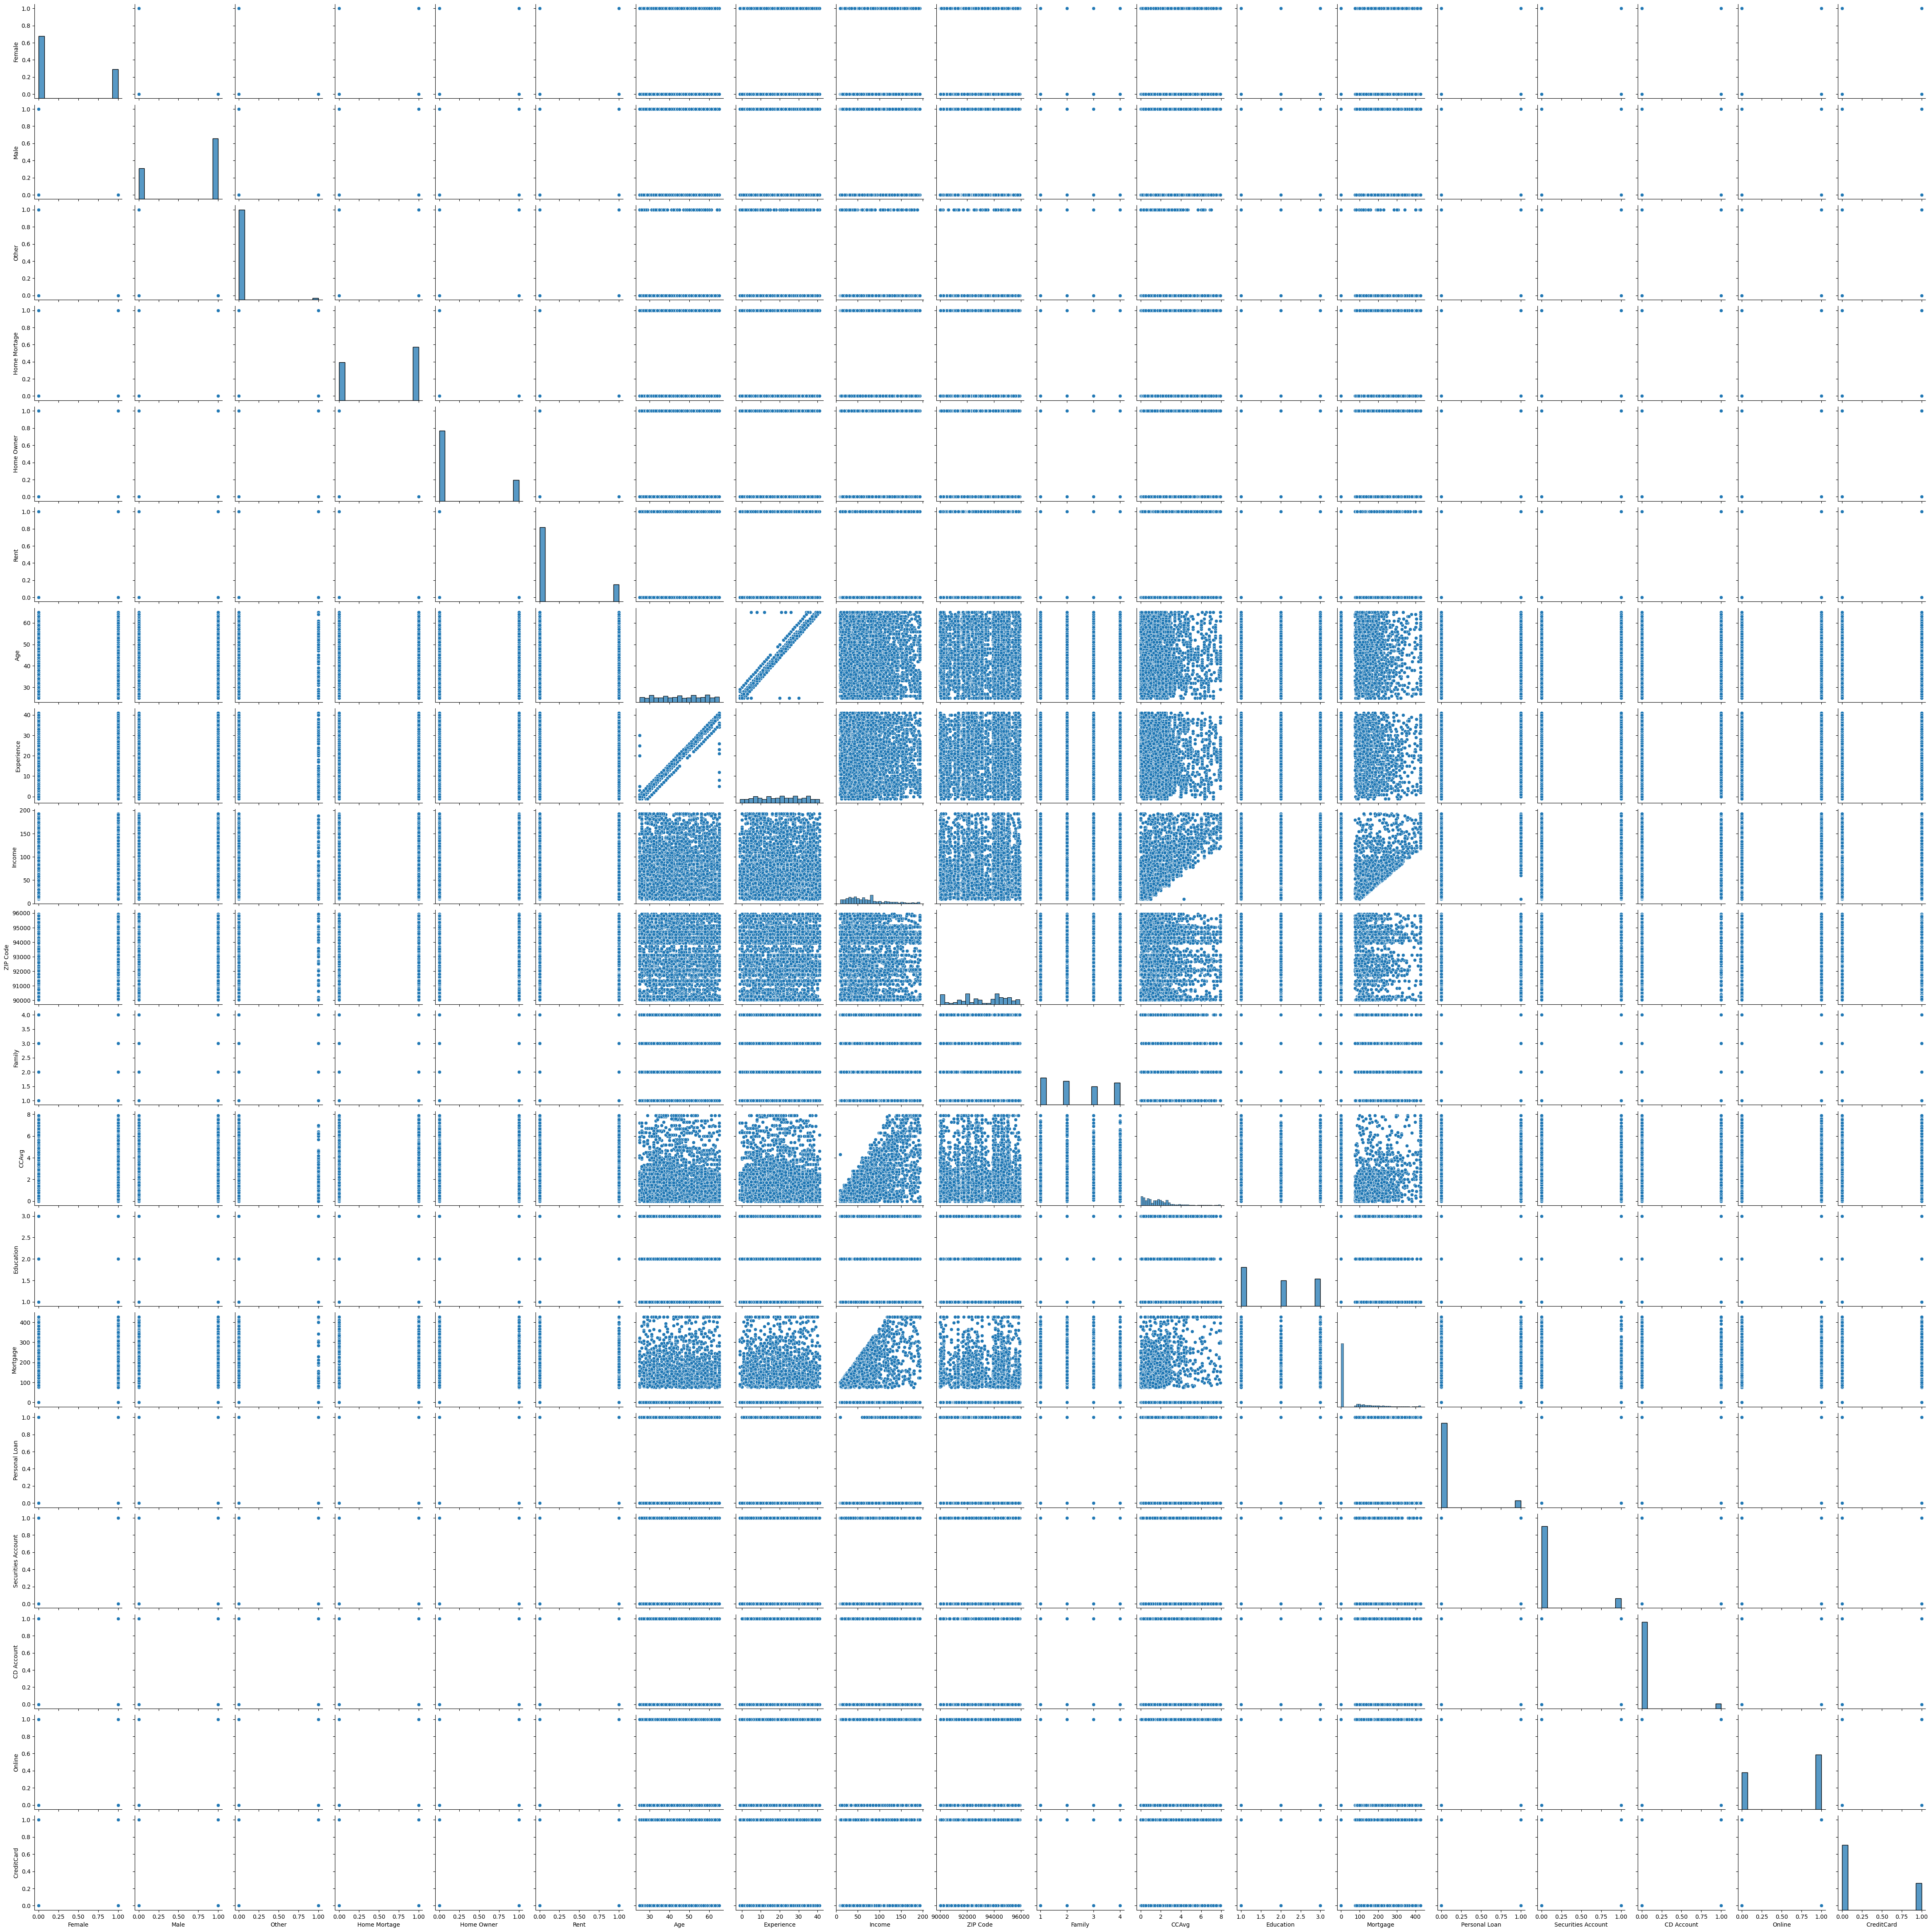

In [497]:
sns.pairplot(data_sec)